In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
import pandas as pd

import pandas as pd

In [ ]:
Data = pd.read_csv('/content/drive/MyDrive/chicken_republic_lagos_sales (1)(Sheet1).csv')

In [ ]:
Data.head()

,Date,Location,Product Category,Product,Quantity Sold,Unit Price (NGN),Total Sales (NGN),Profit (NGN)
0,2024-01-01 00:00:00,Ajah,Meals,Spicy Rice & Chicken,4,946.42,3785.68,796.77
1,2024-01-02 00:00:00,Surulere,Meals,Jollof Rice Combo,1,559.59,559.59,74.31
2,2024-01-02 00:00:00,Lekki,Meals,Refuel Regular,9,1339.04,12051.36,2017.17
3,2024-01-02 00:00:00,Lekki,Meals,Refuel Regular,7,1180.50,8263.50,1019.07
4,2024-01-02 00:00:00,Surulere,Meals,Refuel Max,7,693.43,4854.01,1102.46


In [ ]:
Data

,Date,Location,Product Category,Product,Quantity Sold,Unit Price (NGN),Total Sales (NGN),Profit (NGN)
0,2024-01-01 00:00:00,Ajah,Meals,Spicy Rice & Chicken,4,946.42,3785.68,796.77
1,2024-01-02 00:00:00,Surulere,Meals,Jollof Rice Combo,1,559.59,559.59,74.31
2,2024-01-02 00:00:00,Lekki,Meals,Refuel Regular,9,1339.04,12051.36,2017.17
3,2024-01-02 00:00:00,Lekki,Meals,Refuel Regular,7,1180.50,8263.50,1019.07
4,2024-01-02 00:00:00,Surulere,Meals,Refuel Max,7,693.43,4854.01,1102.46
...,...,...,...,...,...,...,...,...
495,2024-06-20 00:00:00,Victoria Island,Snacks,Sausage Roll,5,1497.78,7488.90,1740.55
496,2024-06-20 00:00:00,Ajah,Meals,Refuel Max,5,1266.03,6330.15,1031.09
497,2024-06-21 00:00:00,Ajah,Snacks,Sausage Roll,9,2089.69,18807.21,4671.91
498,2024-06-21 00:00:00,Surulere,Drinks,Juice,9,2062.87,18565.83,2814.67


In [ ]:
Data = Data.groupby("Date")["Total Sales (NGN)"].sum().reset_index()


In [ ]:
Data["Sales_Smoothed"] = Data["Total Sales (NGN)"].rolling(window=7).mean()


In [ ]:
Datas = Data

In [ ]:
Datas.dropna()

Datas

,Date,Total Sales (NGN),Sales_Smoothed
0,2024-01-01 00:00:00,3785.68,NaN
1,2024-01-02 00:00:00,38308.14,NaN
2,2024-01-03 00:00:00,8845.80,NaN
3,2024-01-04 00:00:00,16195.12,NaN
4,2024-01-05 00:00:00,3307.20,NaN
...,...,...,...
168,2024-06-17 00:00:00,14545.52,20419.738571
169,2024-06-18 00:00:00,14383.72,21124.135714
170,2024-06-19 00:00:00,835.98,17237.798571
171,2024-06-20 00:00:00,33844.16,17240.851429


In [ ]:

mean_value = Data["Sales_Smoothed"].mean()


Data["Sales_Smoothed"] = Data["Sales_Smoothed"].fillna(mean_value)

In [ ]:
Datas

,Date,Total Sales (NGN),Sales_Smoothed
0,2024-01-01 00:00:00,3785.68,22904.505295
1,2024-01-02 00:00:00,38308.14,22904.505295
2,2024-01-03 00:00:00,8845.80,22904.505295
3,2024-01-04 00:00:00,16195.12,22904.505295
4,2024-01-05 00:00:00,3307.20,22904.505295
...,...,...,...
168,2024-06-17 00:00:00,14545.52,20419.738571
169,2024-06-18 00:00:00,14383.72,21124.135714
170,2024-06-19 00:00:00,835.98,17237.798571
171,2024-06-20 00:00:00,33844.16,17240.851429


In [ ]:
DataF= Data.rename(columns={'Date': 'ds', 'Sales_Smoothed': 'y'})

In [ ]:
DataF

,ds,Total Sales (NGN),y
0,2024-01-01 00:00:00,3785.68,22904.505295
1,2024-01-02 00:00:00,38308.14,22904.505295
2,2024-01-03 00:00:00,8845.80,22904.505295
3,2024-01-04 00:00:00,16195.12,22904.505295
4,2024-01-05 00:00:00,3307.20,22904.505295
...,...,...,...
168,2024-06-17 00:00:00,14545.52,20419.738571
169,2024-06-18 00:00:00,14383.72,21124.135714
170,2024-06-19 00:00:00,835.98,17237.798571
171,2024-06-20 00:00:00,33844.16,17240.851429


In [ ]:
DataF = DataF[['ds','y']]
DataF

,ds,y
0,2024-01-01 00:00:00,22904.505295
1,2024-01-02 00:00:00,22904.505295
2,2024-01-03 00:00:00,22904.505295
3,2024-01-04 00:00:00,22904.505295
4,2024-01-05 00:00:00,22904.505295
...,...,...
168,2024-06-17 00:00:00,20419.738571
169,2024-06-18 00:00:00,21124.135714
170,2024-06-19 00:00:00,17237.798571
171,2024-06-20 00:00:00,17240.851429


In [ ]:
import pandas as pd

# convert first
DataF["ds"] = pd.to_datetime(DataF["ds"])

# now you can strip the time if you want
DataF["ds"] = DataF["ds"].dt.date   # becomes Python date objects



/tmp/ipython-input-500332756.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataF["ds"] = pd.to_datetime(DataF["ds"])
/tmp/ipython-input-500332756.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataF["ds"] = DataF["ds"].dt.date   # becomes Python date objects


In [ ]:
DataF

,ds,y
0,2024-01-01,22904.505295
1,2024-01-02,22904.505295
2,2024-01-03,22904.505295
3,2024-01-04,22904.505295
4,2024-01-05,22904.505295
...,...,...
168,2024-06-17,20419.738571
169,2024-06-18,21124.135714
170,2024-06-19,17237.798571
171,2024-06-20,17240.851429


In [ ]:
DataS = DataF


In [ ]:
DataS

DataS = DataS.set_index("ds")


In [ ]:
DataS

,y
ds,
2024-01-01,22904.505295
2024-01-02,22904.505295
2024-01-03,22904.505295
2024-01-04,22904.505295
2024-01-05,22904.505295
...,...
2024-06-17,20419.738571
2024-06-18,21124.135714
2024-06-19,17237.798571


In [ ]:
#USING PROPHET

In [ ]:
from prophet import Prophet

In [ ]:

M = Prophet(interval_width=0.95, daily_seasonality=True)
M.fit(DataF)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8fi8mxr1/7r1yqrwy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8fi8mxr1/97w2ezhy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98060', 'data', 'file=/tmp/tmp8fi8mxr1/7r1yqrwy.json', 'init=/tmp/tmp8fi8mxr1/97w2ezhy.json', 'output', 'file=/tmp/tmp8fi8mxr1/prophet_modelmtkzebf_/prophet_model-20250906152133.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:21:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:21:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future=M.make_future_dataframe(periods=30,freq='D')

forecast = M.predict(future)

forecast[['ds','yhat']]

,ds,yhat
0,2024-01-01,20381.798340
1,2024-01-02,20260.562507
2,2024-01-03,20231.107852
3,2024-01-04,20348.510242
4,2024-01-05,20585.304115
...,...,...
198,2024-07-17,21246.565616
199,2024-07-18,21284.837053
200,2024-07-19,21442.499976
201,2024-07-20,21439.994364


In [ ]:
forecast['y']=DataF['y']

In [ ]:
forecast[['ds','yhat','y']]


forecast.to_csv("forecast.csv", index=False)


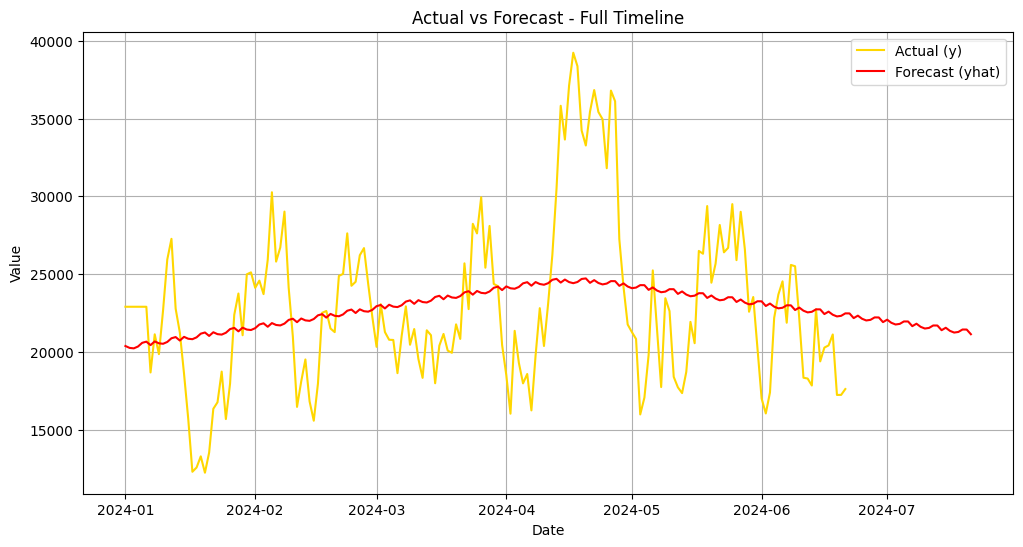

In [ ]:
import matplotlib.pyplot as plt

# --- 1. Full plot ---
plt.figure(figsize=(12,6))
plt.plot(forecast["ds"], forecast["y"], color="gold", label="Actual (y)")
plt.plot(forecast["ds"], forecast["yhat"], color="red", label="Forecast (yhat)")
plt.xlabel("Date")
plt.ylabel("Value")
plt.title("Actual vs Forecast - Full Timeline")
plt.legend()
plt.grid(True)
plt.show()


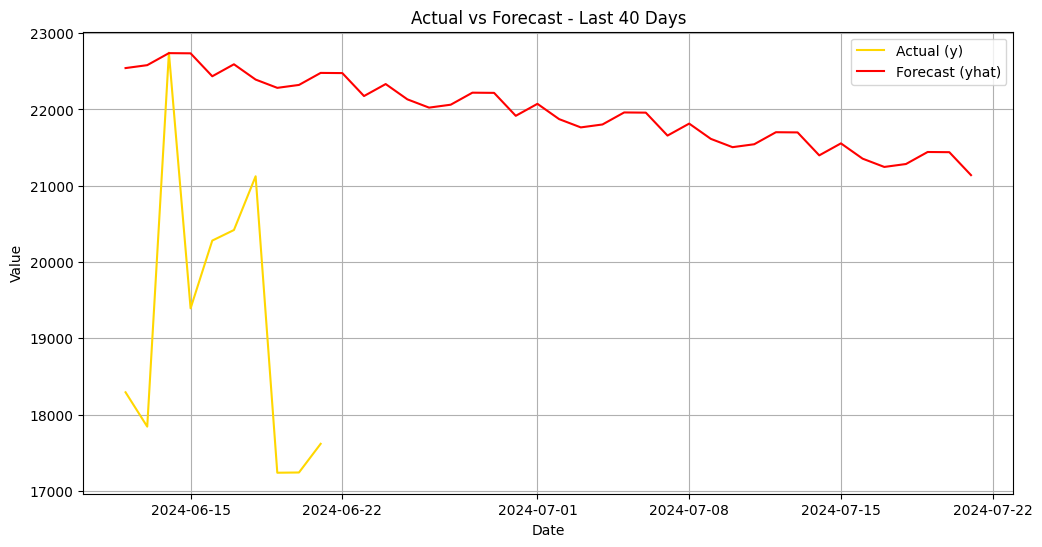

In [ ]:
# --- 2. Last 40 days ---
plt.figure(figsize=(12,6))
plt.plot(forecast["ds"].tail(40), forecast["y"].tail(40), color="gold", label="Actual (y)")
plt.plot(forecast["ds"].tail(40), forecast["yhat"].tail(40), color="red", label="Forecast (yhat)")
plt.xlabel("Date")
plt.ylabel("Value")
plt.title("Actual vs Forecast - Last 40 Days")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
DataS

,y
ds,
2024-01-01,22904.505295
2024-01-02,22904.505295
2024-01-03,22904.505295
2024-01-04,22904.505295
2024-01-05,22904.505295
...,...
2024-06-17,20419.738571
2024-06-18,21124.135714
2024-06-19,17237.798571


In [ ]:
Data
Data.rename(columns={'Date': 'ds', 'Total Sales (NGN)': 'y'}, inplace=True)

In [ ]:
Data.drop(columns=['Sales_Smoothed'], inplace=True)

In [ ]:
Data

,ds,y,Profit_Smoothed
0,2024-01-01 00:00:00,3785.68,NaN
1,2024-01-02 00:00:00,38308.14,NaN
2,2024-01-03 00:00:00,8845.80,NaN
3,2024-01-04 00:00:00,16195.12,NaN
4,2024-01-05 00:00:00,3307.20,NaN
...,...,...,...
168,2024-06-17 00:00:00,14545.52,20419.738571
169,2024-06-18 00:00:00,14383.72,21124.135714
170,2024-06-19 00:00:00,835.98,17237.798571
171,2024-06-20 00:00:00,33844.16,17240.851429


In [ ]:
Data = Data[['ds','y']]
Data

,ds,y
0,2024-01-01 00:00:00,3785.68
1,2024-01-02 00:00:00,38308.14
2,2024-01-03 00:00:00,8845.80
3,2024-01-04 00:00:00,16195.12
4,2024-01-05 00:00:00,3307.20
...,...,...
168,2024-06-17 00:00:00,14545.52
169,2024-06-18 00:00:00,14383.72
170,2024-06-19 00:00:00,835.98
171,2024-06-20 00:00:00,33844.16


In [ ]:

Data["ds"] = pd.to_datetime(DataF["ds"])

# now you can strip the time if you want
Data["ds"] = DataF["ds"].dt.date   # becomes Python date objects



In [ ]:
Data

,ds,y
0,2024-01-01,3785.68
1,2024-01-02,38308.14
2,2024-01-03,8845.80
3,2024-01-04,16195.12
4,2024-01-05,3307.20
...,...,...
168,2024-06-17,14545.52
169,2024-06-18,14383.72
170,2024-06-19,835.98
171,2024-06-20,33844.16


In [ ]:
M2 = Prophet(interval_width=0.95, daily_seasonality=True)
M2.fit(Data)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8fi8mxr1/ik67wwd9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8fi8mxr1/k4id384l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38825', 'data', 'file=/tmp/tmp8fi8mxr1/ik67wwd9.json', 'init=/tmp/tmp8fi8mxr1/k4id384l.json', 'output', 'file=/tmp/tmp8fi8mxr1/prophet_modeldqi8j3cf/prophet_model-20250906155036.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:50:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:50:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future1=M2.make_future_dataframe(periods=32,freq='D')


forecast1 = M2.predict(future)


forecast1

FOR = forecast1[['ds','yhat']]


In [ ]:
FOR

,ds,yhat
0,2024-01-01,21555.816054
1,2024-01-02,17938.496575
2,2024-01-03,19192.051695
3,2024-01-04,22688.092224
4,2024-01-05,22156.714807
...,...,...
198,2024-07-17,25830.939802
199,2024-07-18,29326.979687
200,2024-07-19,28795.601627
201,2024-07-20,24595.131403


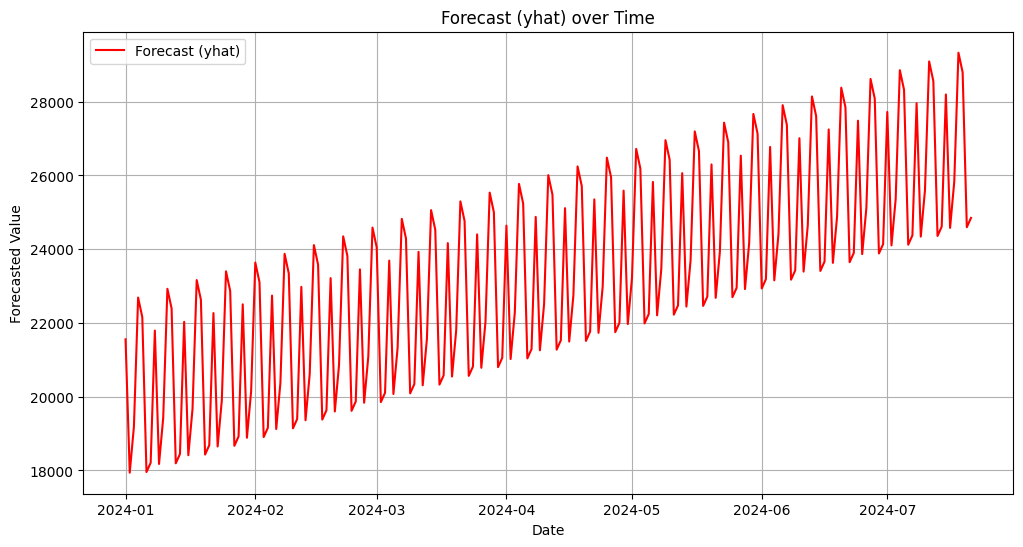

In [ ]:
import matplotlib.pyplot as plt

FOR = forecast1[['ds', 'yhat']]

plt.figure(figsize=(12,6))
plt.plot(FOR["ds"], FOR["yhat"], color="red", label="Forecast (yhat)")

plt.xlabel("Date")
plt.ylabel("Forecasted Value")
plt.title("Forecast (yhat) over Time")
plt.legend()
plt.grid(True)
plt.show()


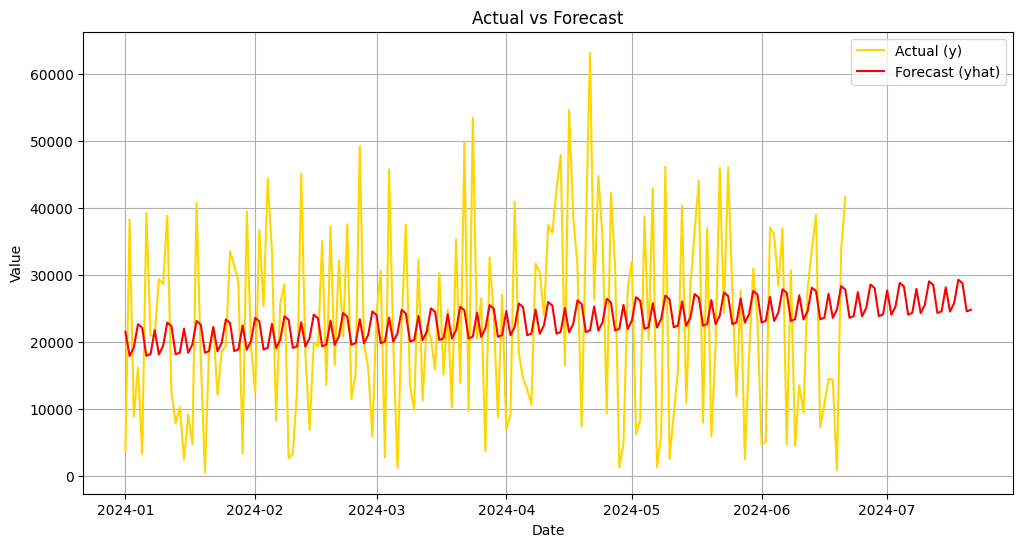

In [ ]:
import matplotlib.pyplot as plt

# Select forecast data
FOR = forecast1[['ds', 'yhat']]

plt.figure(figsize=(12,6))

# Plot actual values (yellow)
plt.plot(Data["ds"], Data["y"], color="gold", label="Actual (y)")

# Plot forecast values (red)
plt.plot(FOR["ds"], FOR["yhat"], color="red", label="Forecast (yhat)")

plt.xlabel("Date")
plt.ylabel("Value")
plt.title("Actual vs Forecast")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
!pip install pmdarima
from pmdarima import auto_arima

In [ ]:
!pip install --upgrade --force-reinstall numpy==1.26.4 scipy pmdarima



  Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached scipy-1.16.1-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (61 kB)
  Using cached pmdarima-2.0.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl.metadata (7.8 kB)
  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
  Using cached cython-3.1.3-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_28_x86_64.whl.metadata (4.7 kB)
  Using cached pandas-2.3.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (91 kB)
  Using cached scikit_learn-1.7.1-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (11 kB)
  Using cached statsmodels-0.14.5-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_28_x86_64.whl.metadata (9.5 kB)
  Using cached urllib3-2.5.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached setuptools-80.9.0-py3-none-any.whl.metadata (6.

In [ ]:
from pmdarima import auto_arima

In [ ]:
DataS

DataS.to_csv("DataS.csv", index=True)

In [ ]:
training = DataS.iloc[:-30]
testing = DataS.iloc[-30:]



In [ ]:
Model = auto_arima(training, seasonal=True, m=7, trace=True)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=2638.781, Time=0.68 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=2660.438, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=2651.241, Time=0.08 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=2643.065, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=2658.467, Time=0.02 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,1)[7] intercept   : AIC=2640.941, Time=0.54 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(1,0,0)[7] intercept   : AIC=2644.722, Time=0.39 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(2,0,1)[7] intercept   : AIC=2637.915, Time=1.44 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(2,0,0)[7] intercept   : AIC=2638.029, Time=0.89 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(2,0,2)[7] intercept   : AIC=2639.909, Time=1.76 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(1,0,2)[7] intercept   : AIC=2638.035, Time=4.25 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(2,0,1)[7] intercept   : AIC=2641.833, Time=2.02 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(2,0,1)[7] intercept   : AIC=2641.734, Time=1.40 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(2,0,1)[7] intercept   : AIC=2639.717, Time=1.26 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,3)(2,0,1)[7] intercept   : AIC=2634.993, Time=1.56 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,3)(1,0,1)[7] intercept   : AIC=2636.207, Time=1.04 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,3)(2,0,0)[7] intercept   : AIC=2635.242, Time=1.28 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,3)(2,0,2)[7] intercept   : AIC=2636.940, Time=2.08 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,3)(1,0,0)[7] intercept   : AIC=2645.448, Time=0.70 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,3)(1,0,2)[7] intercept   : AIC=2635.041, Time=5.54 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,3)(2,0,1)[7] intercept   : AIC=2646.689, Time=0.71 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,3)(2,0,1)[7] intercept   : AIC=2634.774, Time=1.79 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,3)(1,0,1)[7] intercept   : AIC=2636.505, Time=1.13 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,3)(2,0,0)[7] intercept   : AIC=inf, Time=1.39 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,3)(2,0,2)[7] intercept   : AIC=2636.743, Time=2.57 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,3)(1,0,0)[7] intercept   : AIC=inf, Time=1.13 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,3)(1,0,2)[7] intercept   : AIC=2639.791, Time=5.45 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,3)(2,0,1)[7] intercept   : AIC=2636.152, Time=2.70 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,4)(2,0,1)[7] intercept   : AIC=2638.623, Time=2.17 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,4)(2,0,1)[7] intercept   : AIC=2639.315, Time=1.67 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,2)(2,0,1)[7] intercept   : AIC=2640.578, Time=2.49 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,4)(2,0,1)[7] intercept   : AIC=2640.305, Time=6.40 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,3)(2,0,1)[7]             : AIC=2632.908, Time=1.83 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,3)(1,0,1)[7]             : AIC=2634.825, Time=1.08 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,3)(2,0,0)[7]             : AIC=inf, Time=1.38 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,3)(2,0,2)[7]             : AIC=2634.888, Time=2.27 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,3)(1,0,0)[7]             : AIC=inf, Time=1.02 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,3)(1,0,2)[7]             : AIC=2633.067, Time=4.03 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,3)(2,0,1)[7]             : AIC=2633.207, Time=3.94 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(2,0,1)[7]             : AIC=2638.072, Time=1.28 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,3)(2,0,1)[7]             : AIC=2634.316, Time=2.29 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,4)(2,0,1)[7]             : AIC=2636.871, Time=2.09 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(2,0,1)[7]             : AIC=2636.153, Time=1.37 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,4)(2,0,1)[7]             : AIC=2637.559, Time=1.41 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,2)(2,0,1)[7]             : AIC=2638.908, Time=4.03 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,4)(2,0,1)[7]             : AIC=2638.209, Time=3.89 sec

Best model:  ARIMA(3,1,3)(2,0,1)[7]          
Total fit time: 88.605 seconds


In [ ]:
prediction = Model.predict(n_periods=60)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
prediction

prediction.to_csv("prediction.csv", index=True)

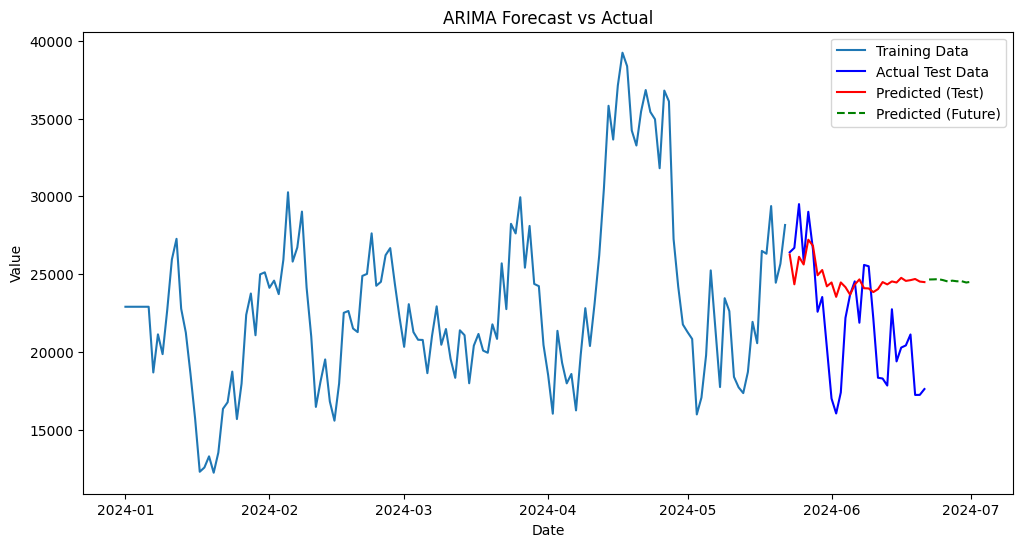

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Split predictions into test-matching (30) and extra future (10)
forecast_test = pd.DataFrame(prediction[:30], index=testing.index, columns=['Prediction'])

future_index = pd.date_range(
    start=testing.index[-1] + pd.Timedelta(days=1),
    periods=10,
    freq='D'  # adjust frequency if your data isn’t daily
)
forecast_future = pd.DataFrame(prediction[30:], index=future_index, columns=['Prediction'])

# Plot
plt.figure(figsize=(12,6))
plt.plot(training.index, training, label="Training Data")
plt.plot(testing.index, testing, label="Actual Test Data", color="blue")
plt.plot(forecast_test.index, forecast_test['Prediction'], label="Predicted (Test)", color="red")
plt.plot(forecast_future.index, forecast_future['Prediction'], label="Predicted (Future)", color="green", linestyle="--")

plt.title("ARIMA Forecast vs Actual")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()
